# Credit_Lead_Prediction

# Data Preprocessing

import basic libraries for preprocessing of data and then import dataset of train and test set then view the datasets

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [44]:
train_df=pd.read_csv(r"C:\Users\cheathan\Downloads\train_s3TEQDk.csv")
train_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [45]:
test_df=pd.read_csv(r"C:\Users\cheathan\Downloads\test_mSzZ8RL.csv")
test_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


describe the dataset gives the statistical view of dataset and also can observe the number of missing values in count

In [46]:
train_df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [47]:
test_df.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


we need to know the type of dataset for analysing data so we use info

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         216400 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [49]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
ID                     105312 non-null object
Gender                 105312 non-null object
Age                    105312 non-null int64
Region_Code            105312 non-null object
Occupation             105312 non-null object
Channel_Code           105312 non-null object
Vintage                105312 non-null int64
Credit_Product         92790 non-null object
Avg_Account_Balance    105312 non-null int64
Is_Active              105312 non-null object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


shape gives overall size of datase

In [50]:
train_df.shape

(245725, 11)

In [51]:
test_df.shape

(105312, 10)

# missing value treatment

for finding number of missing data in dataset, used the isnull

In [52]:
train_df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

following code gives perccentage of missing value

In [53]:
round(100*(train_df.isnull().sum()/len(train_df.index)), 2)

ID                      0.00
Gender                  0.00
Age                     0.00
Region_Code             0.00
Occupation              0.00
Channel_Code            0.00
Vintage                 0.00
Credit_Product         11.93
Avg_Account_Balance     0.00
Is_Active               0.00
Is_Lead                 0.00
dtype: float64

In [54]:
train_df['Credit_Product'].fillna(0,inplace=True)

In [55]:
test_df['Credit_Product'].fillna(0,inplace=True)

# encoding

convert categorical variable into numerical variables

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         245725 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
ID                     105312 non-null object
Gender                 105312 non-null object
Age                    105312 non-null int64
Region_Code            105312 non-null object
Occupation             105312 non-null object
Channel_Code           105312 non-null object
Vintage                105312 non-null int64
Credit_Product         105312 non-null object
Avg_Account_Balance    105312 non-null int64
Is_Active              105312 non-null object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


convert binary variables(yes/no) to 0/1

In [58]:
# List of variables to map

varlist =  ['Is_Active','Credit_Product']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
train_df[varlist] = train_df[varlist].apply(binary_map)

In [59]:
# List of variables to map

varlist =  ['Is_Active','Credit_Product']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
test_df[varlist] = test_df[varlist].apply(binary_map)

In [60]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(test_df[['Gender', 'Region_Code', 'Occupation', 'Channel_Code','Credit_Product']], drop_first=True)

# Adding the results to the master dataframe
test_df = pd.concat([test_df, dummy1], axis=1)

For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [61]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(train_df[['Gender', 'Region_Code', 'Occupation', 'Channel_Code','Credit_Product']], drop_first=True)

# Adding the results to the master dataframe
train_df = pd.concat([train_df, dummy1], axis=1)

In [62]:
train_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,...,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,NNVBBKZB,Female,73,RG268,Other,X3,43,0.0,1045696,0,...,0,0,0,0,1,0,0,0,1,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,0.0,581988,0,...,0,0,0,0,0,1,0,0,0,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,0.0,1484315,1,...,0,0,0,0,0,0,1,0,1,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,0.0,470454,0,...,0,0,0,0,0,1,0,0,0,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,0.0,886787,0,...,0,1,0,0,0,1,0,0,0,0


In [63]:
train_df= train_df.drop(['Gender', 'Region_Code', 'Occupation', 'Channel_Code','Credit_Product'], 1)

In [64]:
test_df= test_df.drop(['Gender', 'Region_Code', 'Occupation', 'Channel_Code','Credit_Product'], 1)

# splitting and scaling

In [65]:
test_ids=test_df['ID'].tolist()
train_df=train_df.drop('ID',axis=1)
test_df=test_df.drop('ID',axis=1)

In [66]:
y=train_df['Is_Lead']
x=train_df.drop('Is_Lead',axis=1)

lets check outliers before scaling

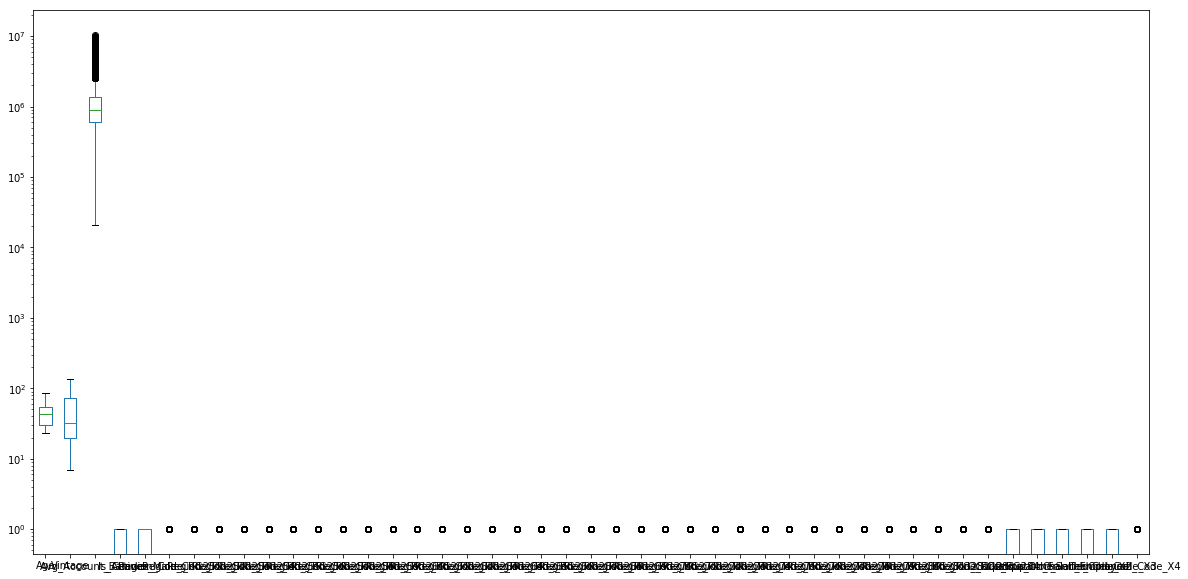

In [68]:
x.plot(kind='box',figsize=(20,10),logy=True)

In [69]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
test_df=scaler.fit_transform(test_df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [71]:
x.shape

(245725, 45)

In [72]:
y.shape

(245725,)

checking the skewness

In [74]:
y.sum()/len(y)

0.23720826126767727

In [75]:
import tensorflow as tf

In [ ]:
inputs=tf.keras.Input(shape=(68,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model=tf.keras.Model(inputs=inputs,outputs=outputs)

model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.AUC(name='auc')]
)

batch_size=64
epochs=25

history=model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

In [80]:
import plotly.express as px

In [84]:
fig=px.line(
    history.history,y=['loss','val_loss'],
    labels={'index':'epoch','value':'Loss'},
    title='Training History')
fig.show()

NameError: name 'history' is not defined

In [82]:
model.evaluate(x_test,y_test)

ValueError: Error when checking input: expected input_1 to have shape (68,) but got array with shape (45,)